In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import scipy.stats

import pickle
import sys
from os import listdir

sys.path.append('../../Beltway_Project/')
sys.path.append('../../RatterdamOpen_Project/')
sys.path.append('../DATA/')
sys.path.append('../../../ratterdam/')

##import RateMapClass_William_20190308 as RateMapClass
import ratterdam_RepetitionCoreFx as CoreFx
import confounds as direction
import newAlleyBounds2 as bounds2

ModuleNotFoundError: No module named 'ratterdam_RepetitionCoreFx'

In [ ]:
## to do
## execute inter neuron removal
## r2_score should not be a variable name, it is a sklearn thing

In [2]:
def omega(tau):
    h = (time[1]-time[0])/2
    sig_window = 50*h##30*h
    mult = 1/(((2*np.pi)**.5)*sig_window)
    return(mult*np.exp((-tau**2)/(2*sig_window**2)))

In [3]:
file = open('maanasa/DATA/20220405-124315_superPopulationRepetition.pickle','rb')
alldat = pickle.load(file)

In [72]:
all_cells = list(alldat[rat][day]['units'].keys())
all_cells[0]

'TT1\\cl-maze1.1'

In [209]:
include_all = True
min_dur = 10

all_rats = list(alldat.keys())
for rat in all_rats:
    all_days = list(alldat[rat].keys())
    for day in all_days:
        print(rat, day)
        dt = 10000
        alley_dict = {}
        timebreaks = []
        x_within = []
        y_within = []
        boundaries = bounds2.loadAlleyBounds(rat, day)[-2]
        bound_list = list(dict.keys(boundaries))
        all_cells = list(alldat[rat][day]['units'].keys())


        data = alldat[rat][day]['units'][all_cells[0]]
        within_list = np.empty(len(data.position))
        time_counter = 0
        time_spent_alley = np.zeros(len(bound_list))
        all_time_spent_alley = np.zeros(len(bound_list))
        for i in range(len(data.position)):
            curr_time = data.position[i, 0]
            x = data.position[i, 1]
            y = data.position[i, 2]
            found = False
            for j in range(len(bound_list)): 
                alley = bound_list[j]
                if x > boundaries[alley][0][0] and x<= boundaries[alley][0][1]:
                    if y>boundaries[alley][1][0] and y<= boundaries[alley][1][1]:
                        alley_dict[str(x) + '_' + str(y)]= j
                        time_spent_alley[j] = time_spent_alley[j] + 1
                        found = True
                        time_counter = time_counter + 1
                        if time_counter> dt:
                            all_time_spent_alley = np.vstack((all_time_spent_alley, time_spent_alley))
                            timebreaks.append(curr_time)
                            time_counter = 0
                            time_spent_alley = np.zeros(len(bound_list))
                        break
            within_list[i] = found
            if found == True:
                x_within.append(x)
                y_within.append(y)
        timebreaks = timebreaks
        all_time_spent_alley = all_time_spent_alley[1:]


        all_data_alley = np.zeros((len(timebreaks),len(bound_list), len(all_cells)))
        num_times = int(np.sum(within_list))
        inst_fr = np.zeros((num_times,len(all_cells)))
        neur_count = 0
        for each_cell in all_cells:

            each_data_alley = np.zeros((len(timebreaks),len(bound_list)))
            data = alldat[rat][day]['units'][each_cell]
            time = data.position[:,0][within_list == True]
            if include_all == True or data.repeating == True:
                omega_tot = np.zeros(num_times)
                time_counter = 0
                for spike in range(0,len(data.spikes)):
                    curr_time = data.spikes[spike,0]
                    x = data.spikes[spike,1]
                    y = data.spikes[spike,2]
                    curr_alley = alley_dict.get(str(x)+ '_' + str(y))
                    if curr_time>timebreaks[time_counter]:
                        time_counter = time_counter + 1
                    if time_counter>len(timebreaks)-1:
                        break
                    if curr_alley!= None:
                        diff = time-data.spikes[:,0][spike]
                        omega_tot = omega_tot + omega(diff)

                        each_data_alley[time_counter,curr_alley]= each_data_alley[time_counter,curr_alley]+1
            ##sb.heatmap(each_data_alley)
            ##plt.show()
            
            ## some alleys spend very little time
            ## if less than min_dur, then made equal to 0
            ## on dividing will give nan, and will be ignored in next steps
            all_time_spent_alley[all_time_spent_alley<min_dur] = 0.0
            
            all_data_alley[:,:, neur_count]= each_data_alley/all_time_spent_alley
            inst_fr[:,neur_count] = omega_tot

            neur_count = neur_count + 1
            print(neur_count)

        np.save('maanasa/DATA/FILES/' + rat + '_' + day + '_x_within.npy', x_within)
        np.save('maanasa/DATA/FILES/' + rat + '_' + day + '_y_within.npy', y_within)
        np.save('maanasa/DATA/FILES/' + rat + '_' + day + '_inst_fr.npy', inst_fr)
        np.save('maanasa/DATA/FILES/' + rat + '_' + day + '_time_alley_neur_normalized_.npy', all_data_alley)
        np.save('maanasa/DATA/FILES/' + rat + '_' + day + '_time_spent_alley.npy', all_time_spent_alley)   




R765 RFD5


<ipython-input-209-f8552fd3f654>:85: RuntimeWarning: invalid value encountered in true_divide
  all_data_alley[:,:, neur_count]= each_data_alley/all_time_spent_alley


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
R765 DFD4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


<ipython-input-209-f8552fd3f654>:85: RuntimeWarning: divide by zero encountered in true_divide
  all_data_alley[:,:, neur_count]= each_data_alley/all_time_spent_alley


32
R781 D3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
R781 D4
1
2
3
4
5
6
7
8
9
10
R808 D6
1
2
3
4
5
6
7
8
9
10
R808 D7
1
2
3
4
5
6
7
8
9
R859 D1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
R859 D2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
R886 D1
1
2
3
4
5
6
7
8
9
R886 D2
1
2
3
4
5
6
7


In [188]:
print(all_time_spent_alley[6,25])

1.0


In [199]:
all_time_spent_alley[all_time_spent_alley<5] = 0

(array([[1., 5., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 2., 1., 1., 1.],
        [0., 0., 4., 2., 1., 0., 0., 0., 0., 0.],
        [1., 3., 3., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 3., 1., 2., 0., 0., 1., 0., 0.],
        [0., 1., 1., 2., 0., 1., 1., 0., 0., 1.],
        [0., 0., 0., 1., 1., 2., 2., 0., 1., 0.],
        [0., 0., 2., 1., 3., 1., 0., 0., 0., 0.],
        [0., 0., 0., 2., 1., 1., 1., 1., 1., 0.],
        [0., 0., 2., 0., 1., 2., 2., 0., 0., 0.],
        [0., 0., 2., 4., 1., 0., 0., 0., 0., 0.],
        [4., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 3., 2., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 3., 3., 1., 0., 0., 0., 0.],
        [0., 0., 1., 2., 1., 2., 0., 0., 0., 1.],
        [4., 2., 0., 1., 0., 0., 0., 0., 0., 0.],
        [5., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [7., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [7., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 5., 1., 0., 0., 0., 0., 0., 0., 0.],


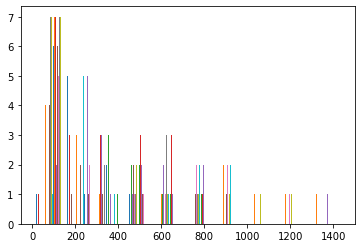

In [195]:
plt.hist(all_time_spent_alley)
##plt.show()

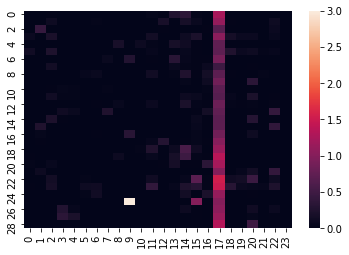

In [138]:
sb.heatmap(all_data_alley[6])

In [186]:
first = np.where(anorm[6] == np.max(anorm[6]))[0][0]
second = np.where(anorm[6] == np.max(anorm[6]))[1][0]
print(first, second)

25 9


In [211]:
np.NaN

nan

R765_RFD5
R765_DFD4
R781_D3
R781_D4
R808_D6
R808_D7
R859_D1
R859_D2
R886_D1
R886_D2


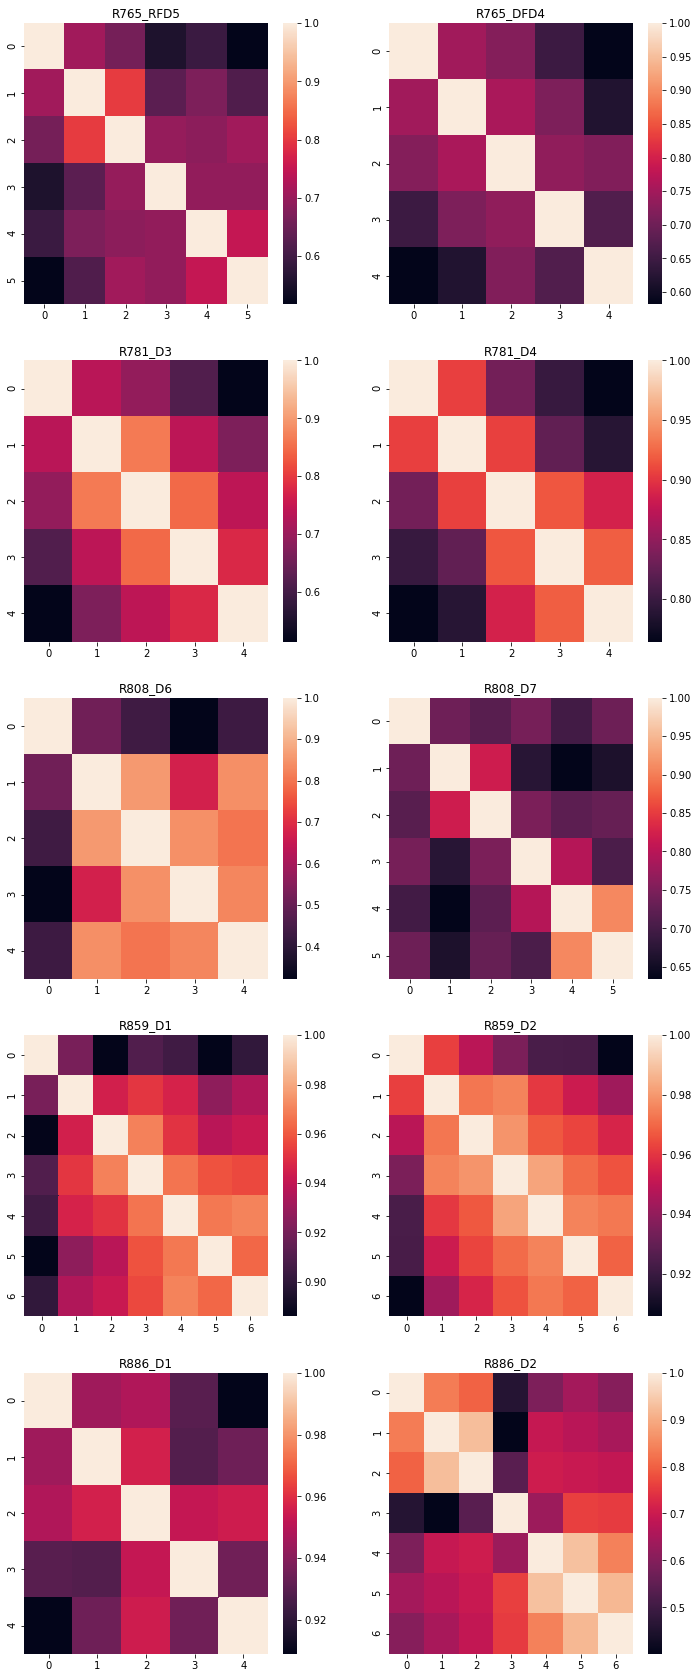

In [213]:
fig, axs = plt.subplots(5,2, figsize = (12,30))
num_cells = []
all_rats = list(alldat.keys())
figy = 0
for rat in all_rats:
    all_days = list(alldat[rat].keys())
    figx = 0
    for day in all_days:
        day_neur = rat + '_' + day
        print(day_neur)
        anorm = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_time_alley_neur_normalized_.npy')
        anorm[anorm == np.inf] = np.NaN
        ## adding to make 0, looks like something wrong here
        ## specifically to R859 D1
        '''if rat == 'R859' and day =='D1':
            first = np.where(anorm[6] == np.max(anorm[6]))[0][0]
            second = np.where(anorm[6] == np.max(anorm[6]))[1][0]
            anorm[6][first, second] = 0
            print('fixing')'''
        
        corr_plot = np.zeros((len(anorm), len(anorm)))
        for i in range(0, len(anorm)):
            for j in range(0, len(anorm)):
                if True not in np.isnan(anorm[i]) and True not in np.isnan(anorm[j]) and i!=j:
                    corr_plot[i,j] = scipy.stats.pearsonr(anorm[i].flatten(),anorm[j].flatten())[0]
                    
                else:
                    no_na_i = ~np.isnan(anorm[i].flatten())
                    no_na_j = ~np.isnan(anorm[j].flatten())
                    no_na = no_na_i*no_na_j
                    corr_plot[i,j] = scipy.stats.pearsonr(anorm[i].flatten()[no_na],anorm[j].flatten()[no_na])[0]
                    
        sb.heatmap(corr_plot, ax = axs[figy, figx])
        axs[figy, figx].set_title(rat + '_' + day)
        ##plt.show()
        figx = figx + 1
    figy = figy + 1

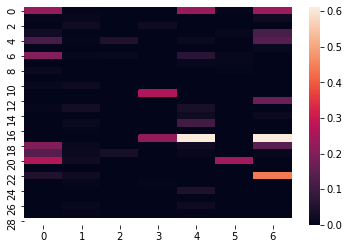

In [216]:
sb.heatmap(anorm[3])

In [208]:
scipy.stats.pearsonr(anorm[i].flatten()[no_na],anorm[j].flatten()[no_na])

ValueError: array must not contain infs or NaNs

In [206]:
anorm[j].flatten()[no_na]

array([0.        , 0.00258565, 0.05946994, 0.04330963, 0.00581771,
       0.03878474, 0.08080155, 0.02327085, 0.        , 0.02456367,
       0.        , 0.00064641, 0.00323206, 0.00840336, 0.00323206,
       0.        , 0.00129282, 0.        , 0.00064641, 0.03038138,
       0.01357466, 0.        , 0.0103426 , 0.03749192, 0.        ,
       0.00064641, 0.00064641, 0.03425986, 0.13057531, 0.12087912,
       0.03232062, 0.00064641, 0.        , 0.08465608, 0.01940035,
       0.02645503, 0.08641975, 0.00352734, 0.07583774, 0.00352734,
       0.00529101, 0.00176367, 0.00176367, 0.00529101, 0.01587302,
       0.10934744, 0.        , 0.00352734, 0.03880071, 0.        ,
       0.        , 0.08112875, 0.02116402, 0.        , 0.        ,
       0.00176367, 0.        , 0.00881834, 0.00352734, 0.01234568,
       0.01410935, 0.01940035, 0.07936508, 0.        , 0.        ,
       0.        , 0.05345212, 0.02672606, 0.0311804 , 0.0155902 ,
       0.09131403, 0.        , 0.01113586, 0.00222717, 0.     

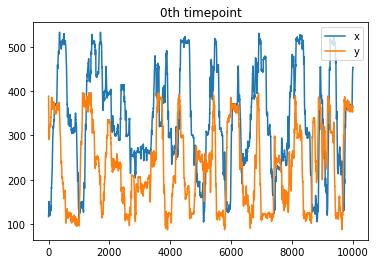

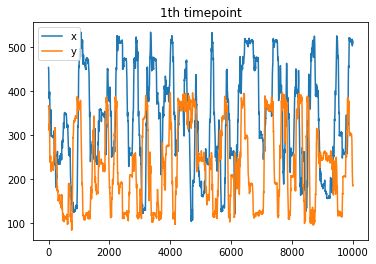

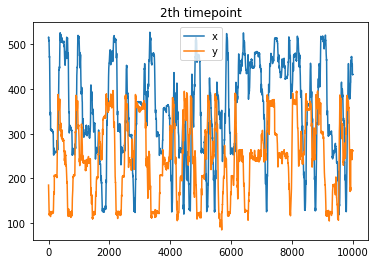

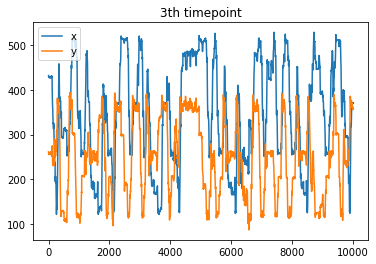

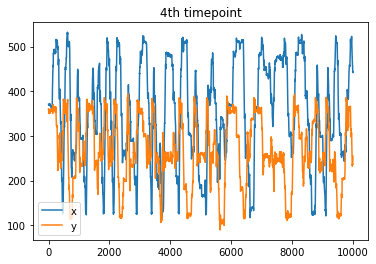

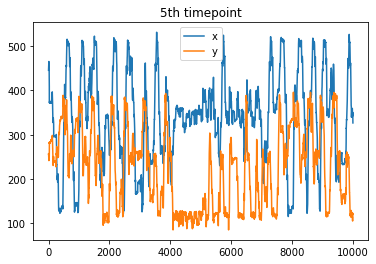

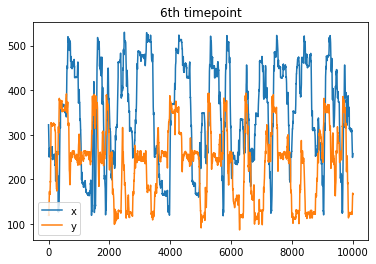

In [127]:
rat = 'R859'
day = 'D2'
x = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_x_within.npy')
y = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_y_within.npy')
for i in range(0, 7):
    plt.plot(x[i*dt:(i+1)*dt], label = 'x')
    plt.plot(y[i*dt:(i+1)*dt], label = 'y')
    plt.title(str(i) + 'th timepoint')
    plt.legend()
    plt.show()
    ##plt.plot(inst_fr[i*dt:(i+1)*dt])
    ##plt.show()
##plt.plot(y)

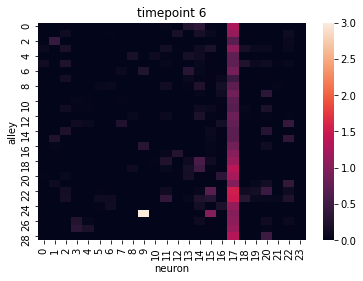

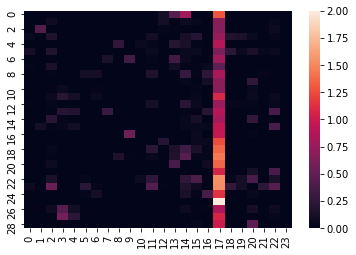

In [182]:
sb.heatmap(anorm[6])
plt.xlabel('neuron')
plt.ylabel('alley')
plt.title('timepoint 6')
plt.show()
sb.heatmap(anorm[5])

In [122]:

print(first, second)

25 9


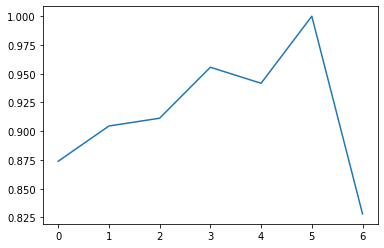

In [105]:
corrs = []
for i in range(0, 7):
    corrs.append(scipy.stats.pearsonr(anorm[5].flatten(), anorm[i].flatten())[0])
plt.plot(corrs)

In [157]:
include_only = np.mean(anorm, axis = (0,1))<0.1
np.shape(inst_fr[:,include_only])

(72353, 22)

In [160]:
np.shape(np.sum(np.nanmean(anorm, axis = 0), axis = 0))

(39,)

In [154]:
rat = 'R859'
day = 'D2'
anorm = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_time_alley_neur_normalized_.npy')
print(np.shape(anorm))
np.sum(np.nanmean(anorm, axis = 0)>0.02)
print(np.shape(np.nanmean(anorm, axis = (0,1))))

(7, 29, 39)
(39,)


<ipython-input-154-7e66ac26b37e>:5: RuntimeWarning: Mean of empty slice
  np.sum(np.nanmean(anorm, axis = 2)>0.02)


R765_RFD5
(6, 29, 22)
(6, 29, 22)
(0.27939939942988307, 0.13484416035964292)
SpearmanrResult(correlation=0.2014487493175891, pvalue=0.28575168238580234)
R765_DFD4
(5, 29, 32)
(5, 29, 31)
(0.5584273110886233, 0.010495298127086168)
SpearmanrResult(correlation=0.5200315712903568, pvalue=0.018755240105409476)
R781_D3
(5, 29, 17)
(5, 29, 17)
(0.1724376038333449, 0.46723646211937186)
SpearmanrResult(correlation=0.24453004293993214, pvalue=0.2987870212055387)
R781_D4
(5, 29, 10)
(5, 29, 10)
(0.3965754084348253, 0.08342495900366614)
SpearmanrResult(correlation=0.2958511630631278, pvalue=0.20534246932961853)
R808_D6
(5, 29, 10)
(5, 29, 10)
(0.5224587442373583, 0.018113798306035662)
SpearmanrResult(correlation=0.4818181818181819, pvalue=0.031462099648405246)
R808_D7
(6, 29, 9)
(6, 29, 8)
(0.28625571195620303, 0.1251378679927535)
SpearmanrResult(correlation=0.21789763698809766, pvalue=0.24738408687664296)
R859_D1
(7, 29, 24)
(7, 29, 22)
(0.5209167761396654, 0.0004048678133382764)
SpearmanrResult(

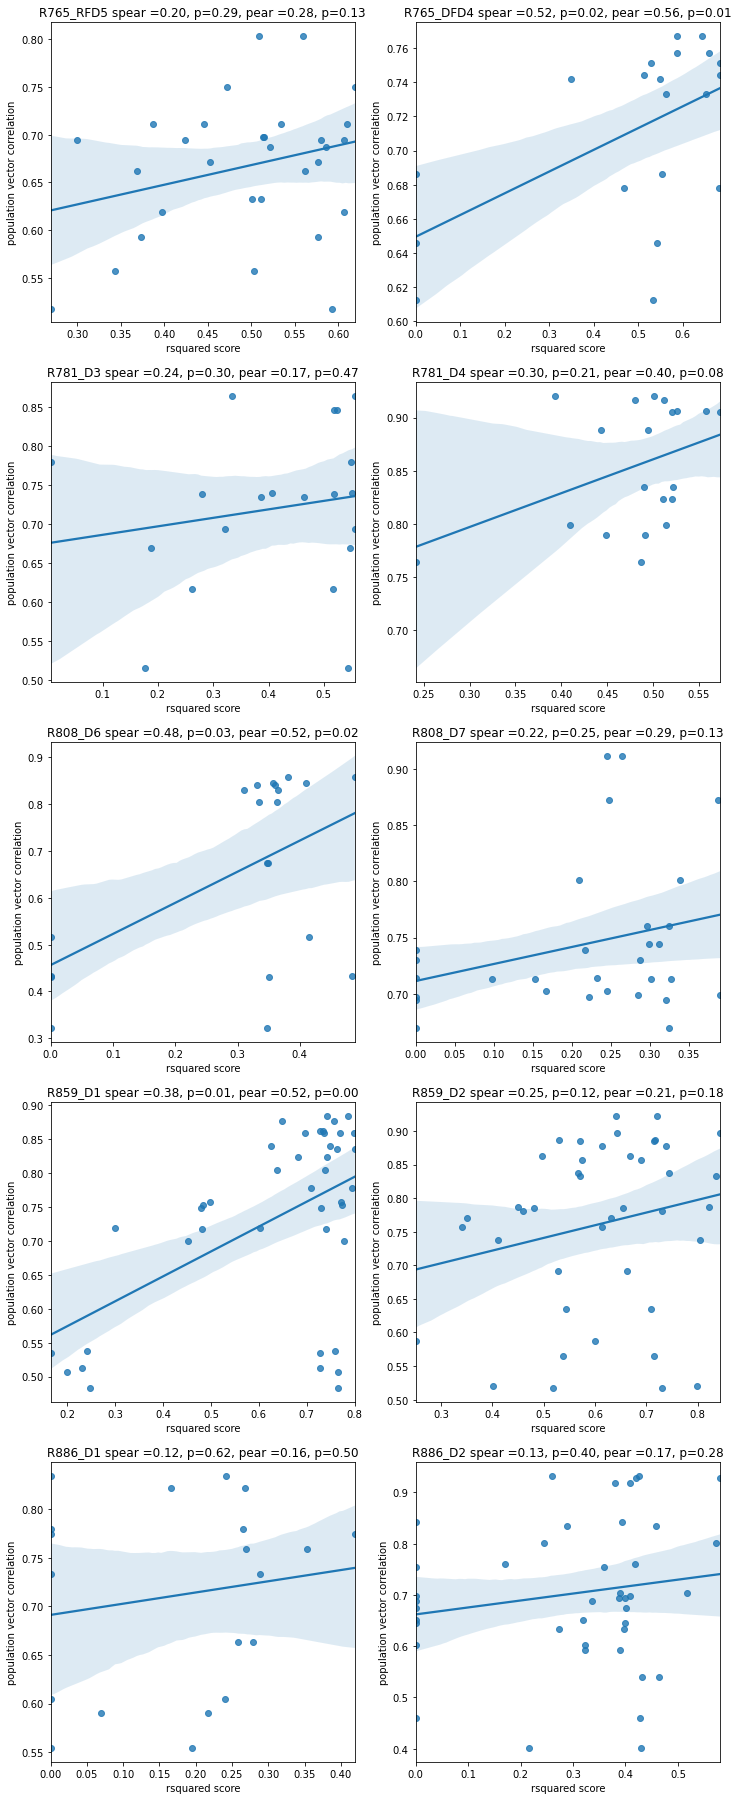

In [185]:
## pv correlation, regression score scatter plot
interneuron_thresh = 0.03 ##0.08
fig, axs = plt.subplots(5,2, figsize = (12,32))
##fig, axs = plt.subplots(9,1, figsize = (6,32))
num_cells = []
all_rats = list(alldat.keys())
figy = 0
all_pearson_corr =[]
all_pearson_p = []
all_spearman_corr =[]
all_spearman_p = []
all_rat_day = []
for rat in all_rats:
    all_days = list(alldat[rat].keys())
    figx = 0
    for day in all_days:
        
        
        day_neur = rat + '_' + day
        all_rat_day.append(day_neur)
        print(day_neur)
        x = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_x_within.npy')
        y = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_y_within.npy')
        inst_fr = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_inst_fr.npy')
        anorm = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_time_alley_neur_normalized_.npy')
        anorm[anorm == np.inf] = np.NaN
        
        print(np.shape(anorm))
        ## excluding interneurons
        exclude_only = np.nanmean(anorm, axis = (0,1))> interneuron_thresh
        exclude_only= exclude_only*(np.sum(np.nanmean(anorm, axis = 0)>0.03, axis = 0)>17)
        include_only = ~exclude_only
        '''for ex in range(len(exclude_only)):
            if exclude_only[ex] == True:
                sb.heatmap(anorm[:,:,ex], ax = axs[figy])
                axs[figy].set_title(rat + '_' + day + '_' + str(ex))
                ##plt.show()
                figy = figy + 1'''
        
        anorm = anorm[:,:, include_only]
        
        print(np.shape(anorm))
        inst_fr[:,include_only]
        
        
        
        scaler = StandardScaler()
        inst_fr = scaler.fit_transform(inst_fr)

        dt = 10000
        buffer = 1000
        train_size = 80000
        num_cells.append(np.shape(anorm)[2])
        corr_score = []
        for i in range(0, len(anorm)):
            model = LinearRegression()
            X_train = inst_fr[i*dt+ buffer: i*dt+ buffer + train_size]
            y_train = x[i*dt+ buffer: i*dt+ buffer + train_size]
            model.fit(X_train, y_train)
            model2 = LinearRegression()
            y2_train = y[i*dt+ buffer: i*dt+ buffer + train_size]
            model2.fit(X_train, y2_train)
            for j in range(0, len(anorm)):
                X_test = inst_fr[j*dt: (j+1)*dt]
                y_test = x[j*dt: (j+1)*dt]
                y2_test = y[j*dt: (j+1)*dt]
                r2_score1 = model.score(X_test, y_test)
                r2_score2 = model2.score(X_test, y2_test)
                
                ## limiting to 0
                r2_score1 = np.maximum(r2_score1, 0)
                r2_score2 = np.maximum(r2_score2, 0)
                
                error = (np.mean((model.predict(X_test)-y_test)**2))**.5
                error2 = (np.mean((model2.predict(X_test)-y2_test)**2))**.5
                if True not in np.isnan(anorm[i]) and True not in np.isnan(anorm[j]) and i!=j:
                    cor_val = scipy.stats.pearsonr(anorm[i].flatten(),anorm[j].flatten())
                    corr_score.append(np.array([cor_val[0],r2_score1, r2_score2,error, error2]))
                elif i!=j:
                    no_na_i = ~np.isnan(anorm[i].flatten())
                    no_na_j = ~np.isnan(anorm[j].flatten())
                    no_na = no_na_i*no_na_j
                    cor_val = scipy.stats.pearsonr(anorm[i].flatten()[no_na],anorm[j].flatten()[no_na])
                    corr_score.append(np.array([cor_val[0],r2_score1, r2_score2,error, error2]))
        corr_score = np.array(corr_score)
        ##plt.plot(corr_score[:,0],corr_score[:,1],'o', label = day_neur)
        ##plt.plot(corr_score[:,2],corr_score[:,1],'o', label = day_neur)
        sb.regplot(corr_score[:,2],corr_score[:,0], ax = axs[figy, figx])
        print(scipy.stats.pearsonr(corr_score[:,2],corr_score[:,0]))
        print(scipy.stats.spearmanr(corr_score[:,2],corr_score[:,0]))
        spearman_corr = scipy.stats.spearmanr(corr_score[:,2],corr_score[:,0])
        pearson_corr = scipy.stats.pearsonr(corr_score[:,2],corr_score[:,0])
        all_pearson_corr.append(pearson_corr[0])
        all_pearson_p.append(pearson_corr[1])
        all_spearman_corr.append(spearman_corr[0])
        all_spearman_p.append(spearman_corr[1])
        
        axs[figy, figx].set_title(rat + '_' + day +' spear ='+ "{:.2f}".format(spearman_corr[0]) + ', p=' + "{:.2f}".format(spearman_corr[1]) + ', pear =' + "{:.2f}".format(pearson_corr[0]) + ', p=' + "{:.2f}".format(pearson_corr[1]))
        ##axs[figy, figx].set_xlabel('root-mean-squared-error')
        axs[figy, figx].set_xlabel('rsquared score')
        axs[figy, figx].set_ylabel('population vector correlation')
        
        ##plt.xlim(0,1)
        ##plt.show()
        figx = figx + 1
    figy = figy + 1
        
##plt.legend()

plt.show()


In [187]:
all_rat_day

['R765_RFD5',
 'R765_DFD4',
 'R781_D3',
 'R781_D4',
 'R808_D6',
 'R808_D7',
 'R859_D1',
 'R859_D2',
 'R886_D1',
 'R886_D2']

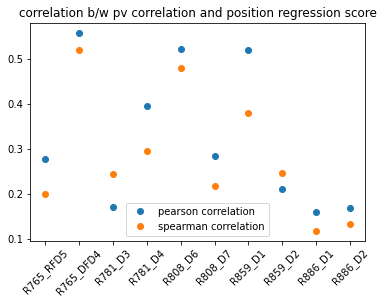

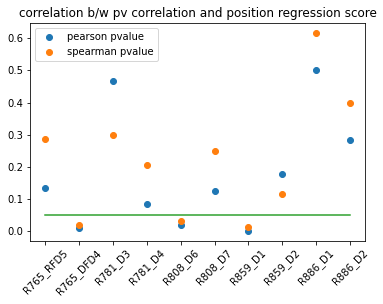

In [202]:
fig, ax = plt.subplots()
ax.plot(all_pearson_corr,'o', label = 'pearson correlation')
ax.plot(all_spearman_corr,'o', label = 'spearman correlation')
ax.set_xticks(np.arange(0, len(all_rat_day)))
ax.set_xticklabels(all_rat_day,rotation = 45)
##ax.set_ylim(0,1)

ax.legend()
ax.set_title('correlation b/w pv correlation and position regression score')

plt.show()

fig, ax = plt.subplots()
ax.plot(all_pearson_p,'o', label = 'pearson pvalue')
ax.plot(all_spearman_p,'o', label = 'spearman pvalue')
ax.set_xticks(np.arange(0, len(all_rat_day)))
ax.set_xticklabels(all_rat_day,rotation = 45)
ax.legend()
ax.plot([0.05]*len(all_rat_day))
ax.set_title('correlation b/w pv correlation and position regression score')
plt.show()

[22, 32, 17, 10, 10, 9, 24, 39, 9, 7]

D1


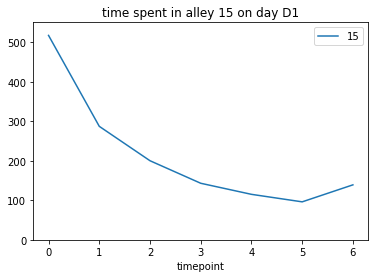

D2


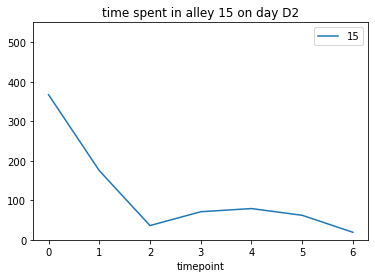

In [70]:
## Changes in behavior
## Learning to avoid alley 15
## For rat R859 D1, and D2

rat = 'R859'
all_days = list(alldat[rat].keys())
for day in all_days:
    print(day)

    all_cells = list(alldat[rat][day]['units'].keys())
    data = alldat[rat][day]['units'][all_cells[0]]
    time_counter = 0
    time_spent_alley = np.zeros(len(bound_list))
    all_time_spent_alley = np.zeros(len(bound_list))
    for i in range(len(data.position)):
        curr_time = data.position[i, 0]
        x = data.position[i, 1]
        y = data.position[i, 2]
        found = False
        
        for j in range(len(bound_list)): 
            alley = bound_list[j]
            if x > boundaries[alley][0][0] and x<= boundaries[alley][0][1]:
                if y>boundaries[alley][1][0] and y<= boundaries[alley][1][1]:
                    time_spent_alley[j] = time_spent_alley[j] + 1
                    found = True
                    time_counter = time_counter + 1
                    if time_counter> dt:
                        all_time_spent_alley = np.vstack((all_time_spent_alley, time_spent_alley))
                        timebreaks.append(curr_time)
                        time_counter = 0
                        time_spent_alley = np.zeros(len(bound_list))
                        
                    break
                    
    all_time_spent_alley= all_time_spent_alley[1:]
    for i in [15]:
        plt.plot(all_time_spent_alley[:,i], label = i)
        plt.xlabel('timepoint')
        plt.title('time spent in alley 15 on day ' + day)
    plt.legend()
    plt.ylim(0, 550)
    plt.show()



/Users/maanasa/Desktop/JHU_RESEARCH/ratterdam_maanasa/maanasa/DATA/R859_RatterdamOpen_D3/
R859
D3


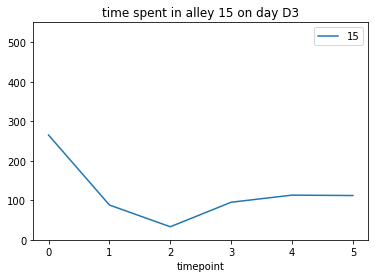

In [72]:
## Changes in behavior
## Learning to avoid alley 15
## Need to calculate separately for R859 D3, since data not processed

datadir = '/Users/maanasa/Desktop/JHU_RESEARCH/ratterdam_maanasa/maanasa/DATA/R859_RatterdamOpen_D3/'
tetrode = 'TT10/'
eachfile = 'cl-maze1.1'
dt = 10000
data = CoreFx.loadRepeatingUnit(datadir, tetrode + eachfile, tetrode + eachfile)
alltime = np.array(data.position)[:,0]
time_spent_alley = np.zeros(len(bound_list))
all_time_spent_alley = np.zeros(len(bound_list))
time_counter = 0
timebreaks = []
for i in range(len(data.position)):
    curr_time = data.position[i, 0]
    x = data.position[i, 1]
    y = data.position[i, 2]
    found = False
    
    
    for j in range(len(bound_list)): 
        alley = bound_list[j]
        if x > boundaries[alley][0][0] and x<= boundaries[alley][0][1]:
            if y>boundaries[alley][1][0] and y<= boundaries[alley][1][1]:
                time_spent_alley[j] = time_spent_alley[j] + 1
                found = True
                time_counter = time_counter + 1
                if time_counter> dt:
                    all_time_spent_alley = np.vstack((all_time_spent_alley, time_spent_alley))
                    timebreaks.append(curr_time)
                    time_counter = 0
                    time_spent_alley = np.zeros(len(bound_list))

                break

all_time_spent_alley= all_time_spent_alley[1:]
for i in [15]:
    plt.plot(all_time_spent_alley[:,i], label = i)
plt.legend()
plt.ylim(0, 550)
plt.xlabel('timepoint')
plt.title('time spent in alley 15 on day ' + 'D3')
plt.show()

R765 RFD5
4
0.010955089974241926


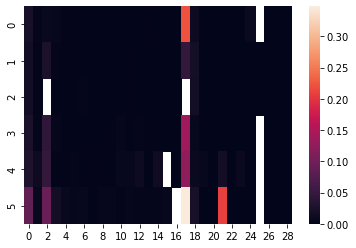

11
0.03766957277765948


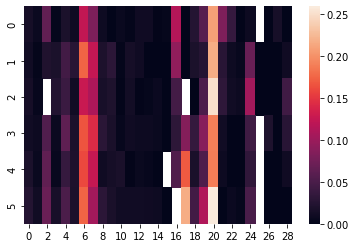

8
0.029907275367473823


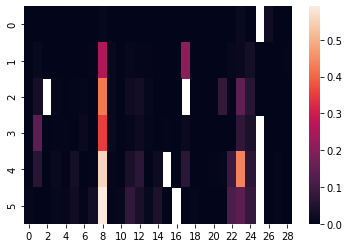

16
0.065454631303307


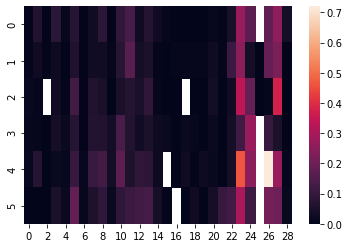

4
0.012523601986483553


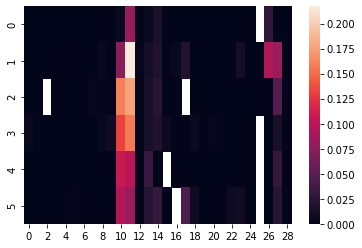

2
0.009353030859349222


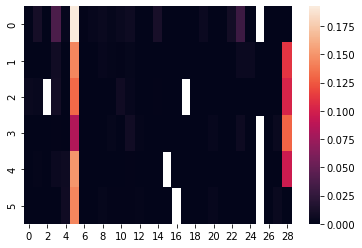

9
0.03607569478028832


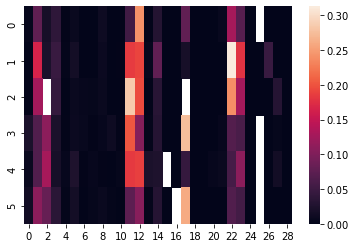

3
0.012764280197879068


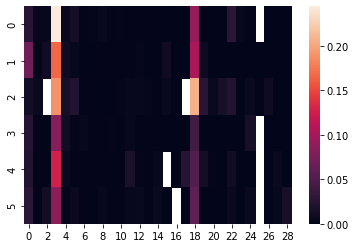

6
0.024283979843866325


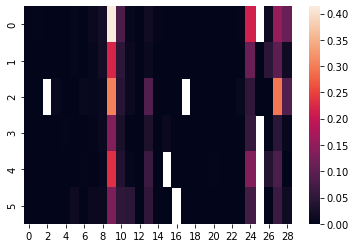

6
0.01712573915199091


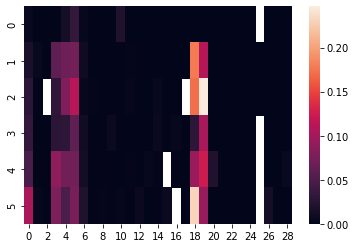

7
0.015983300771978293


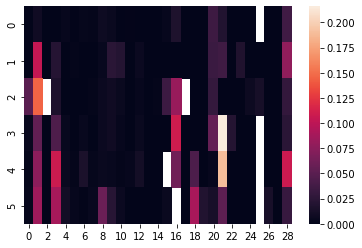

7
0.01574951480658108


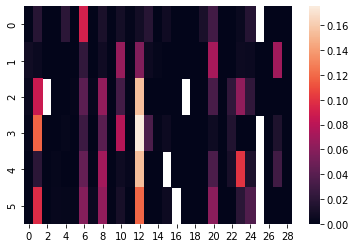

2
0.009411573074625043


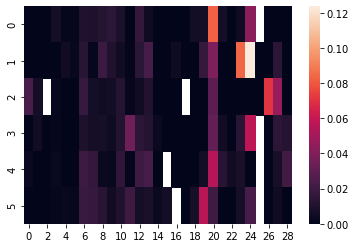

2
0.006678668755431342


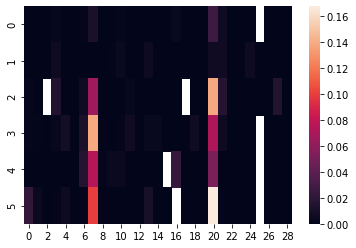

3
0.005773330988090997


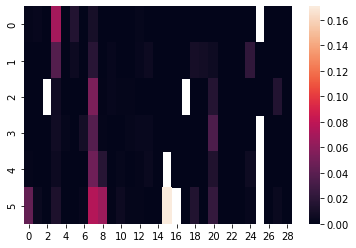

6
0.015471931282720754


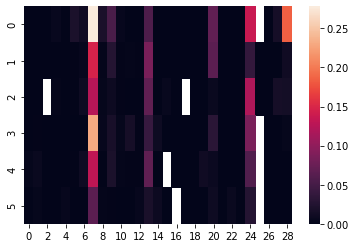

4
0.01222870642909707


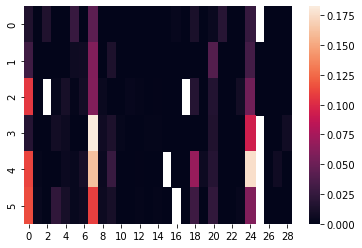

11
0.024002299680946106


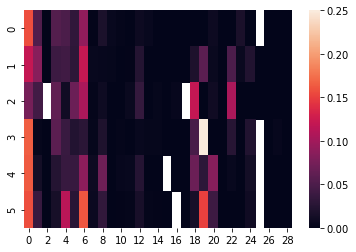

3
0.010252564424861572


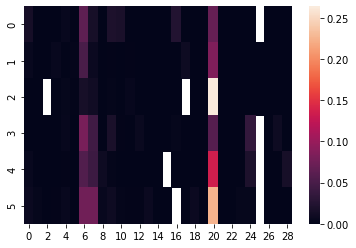

5
0.017213323092325077


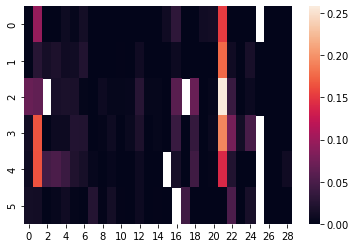

5
0.009787669868514875


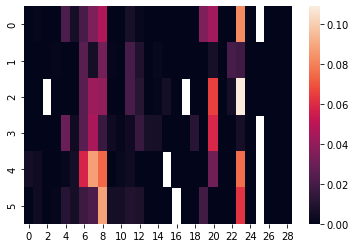

5
0.013272414589123841


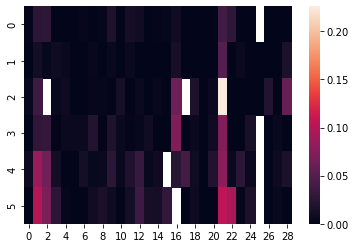

R765 DFD4
4
0.009401097920305976


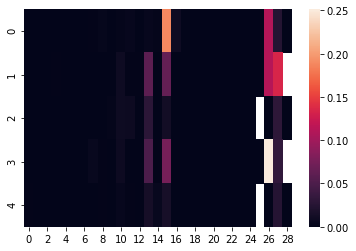

5
0.01755861649662156


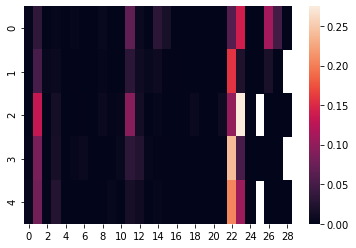

5
0.009889912515285712


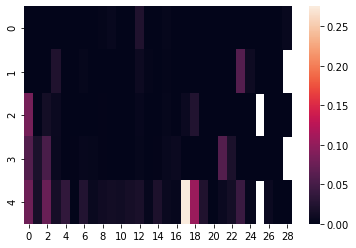

9
0.02194590108274414


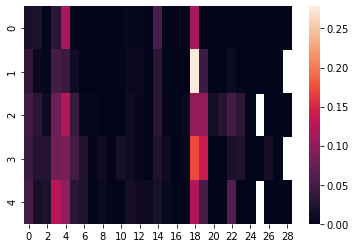

5
0.020693685720536172


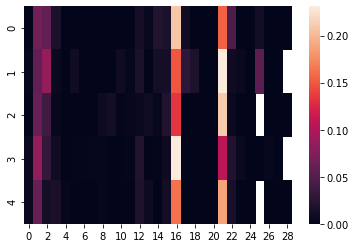

7
0.01656574675023568


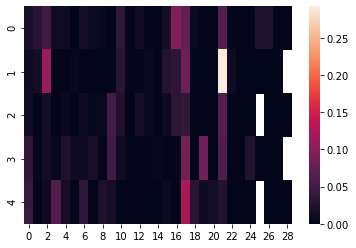

23
0.04984238240337263


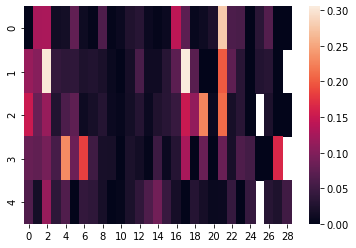

3
0.00995483024509888


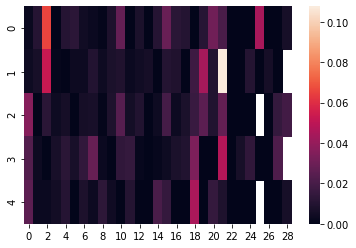

7
0.01260829639208966


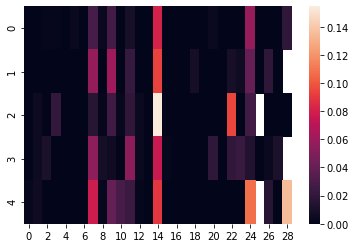

3
0.0120915116123704


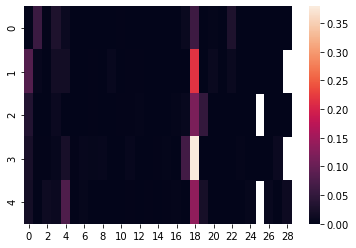

3
0.015652281167674517


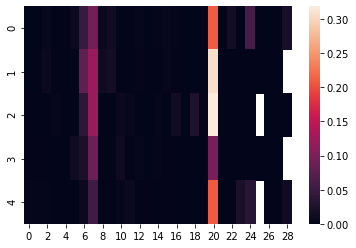

4
0.015249307255916354


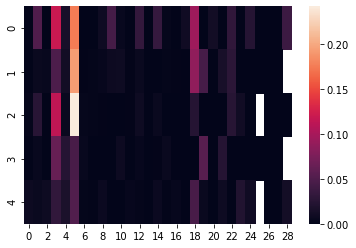

14
0.04016361696625372


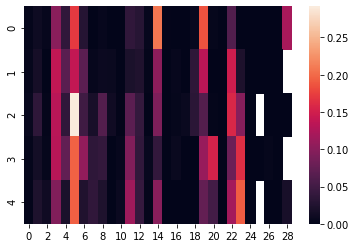

20
0.04177581915152928


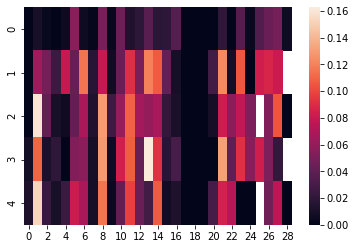

6
0.018119224540810563


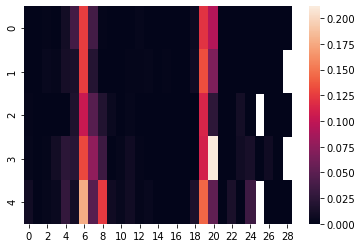

4
0.011442063245128758


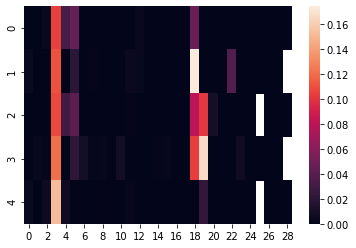

5
0.011186724881616903


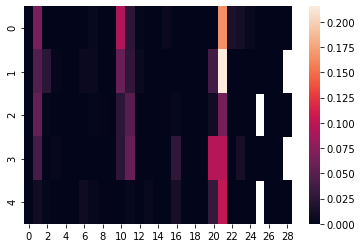

2
0.0038426149216682403


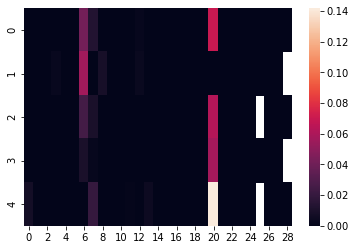

2
0.004169105439415547


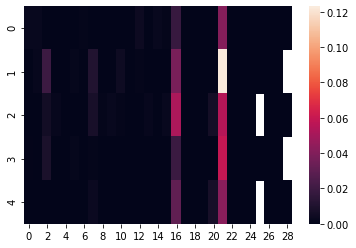

10
0.048158077362248024


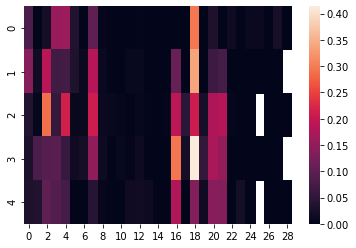

7
0.02036782289420864


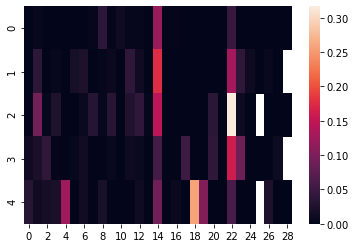

4
0.011982301627608319


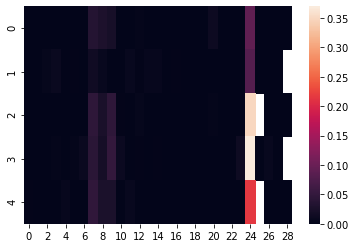

4
0.012285302362047846


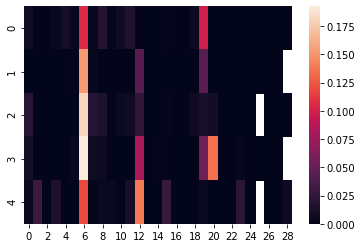

4
0.01025922183170062


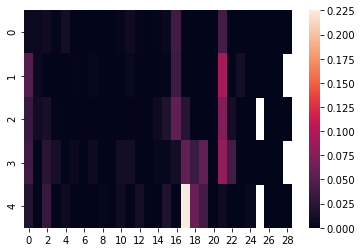

5
0.012319038566578037


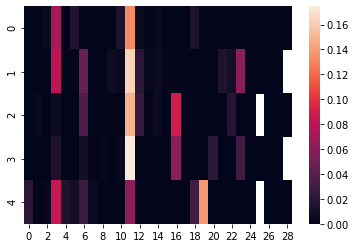

7
0.03859060467119626


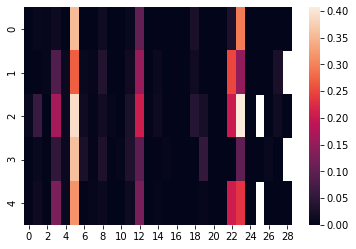

3
0.009315639883176158


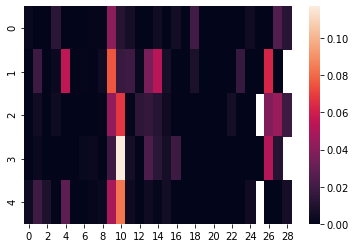

12
0.03635379472656047


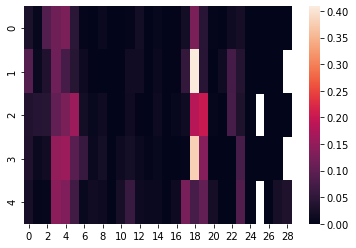

8
0.027921691434457167


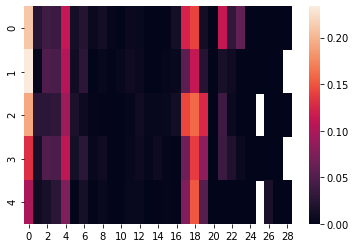

9
0.026338092325594552


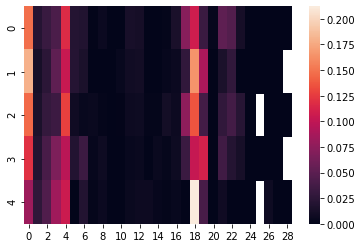

8
0.028604302987619172


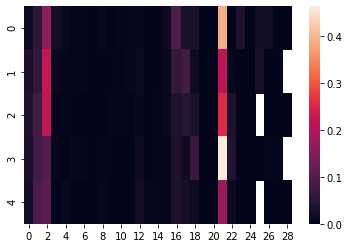

4
0.012328286624716035


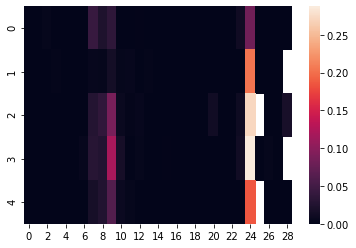

R781 D3
1
0.002866353978008421


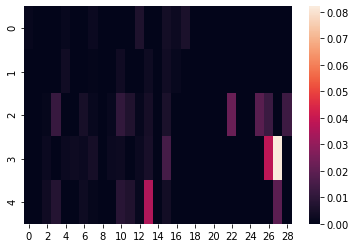

1
0.004204574808595973


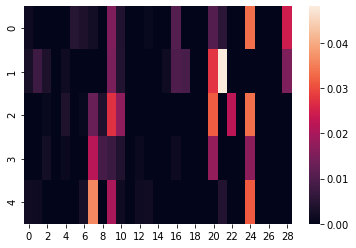

5
0.01631714838082196


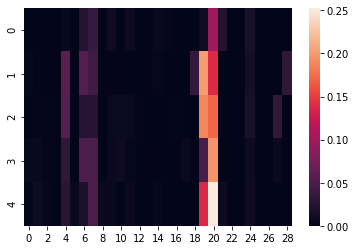

6
0.015082279536104382


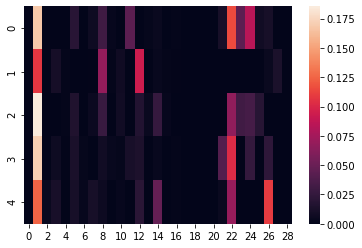

1
0.001815291480871932


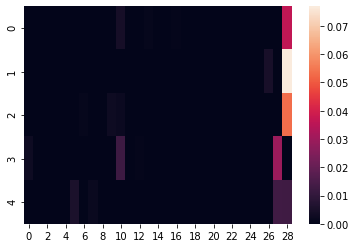

0
0.0025854156524637312


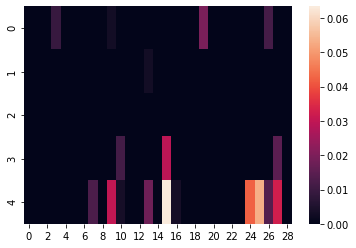

7
0.02068467386202269


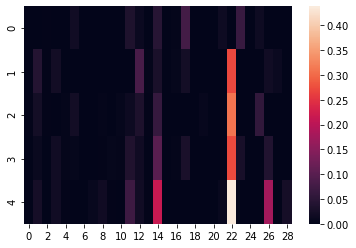

3
0.016867152427042086


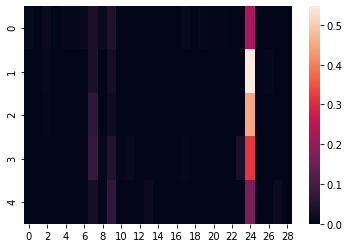

4
0.013617688753572393


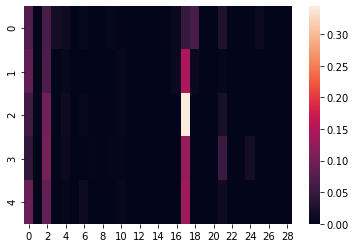

0
0.0007429429537062566


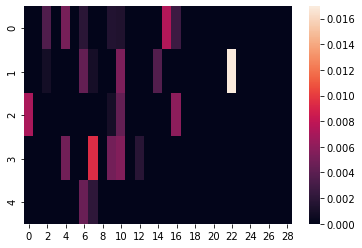

2
0.005938589797070745


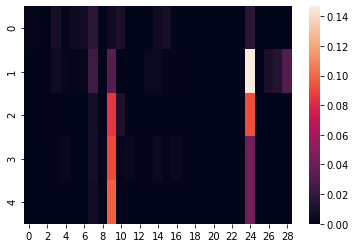

2
0.004988164246210807


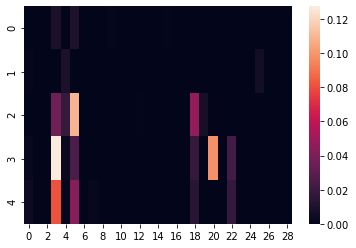

8
0.046908641055377634


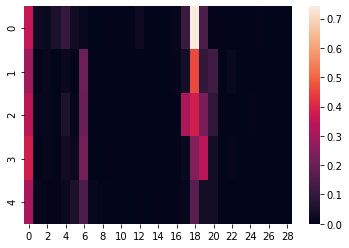

5
0.01777051292673708


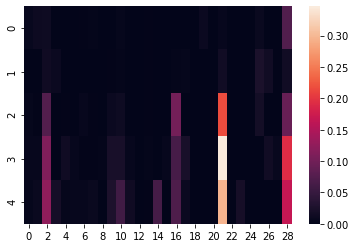

10
0.025111165716340655


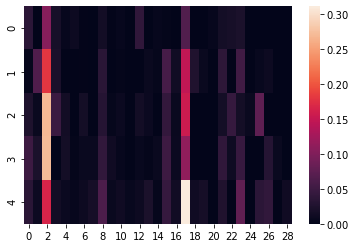

3
0.01591317546731592


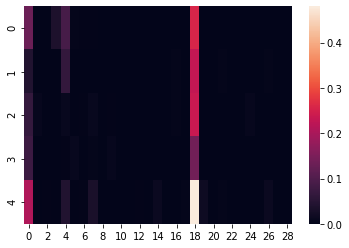

1
0.0028984200157071392


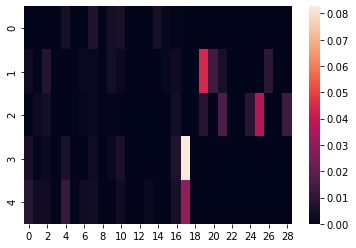

R781 D4
0
0.000722867963781484


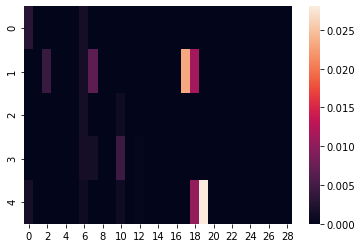

10
0.05675944707819661


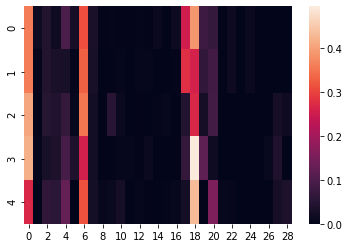

1
0.00398513823810925


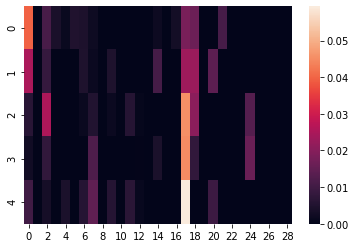

15
0.037368061330533255


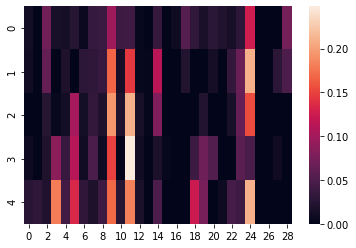

5
0.026362598513915345


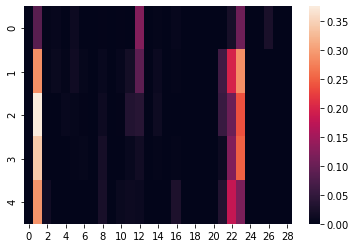

4
0.02454780378659312


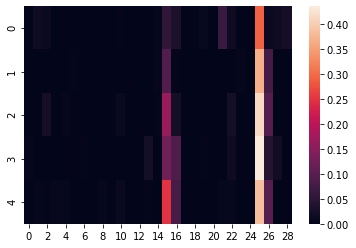

5
0.018971773229005198


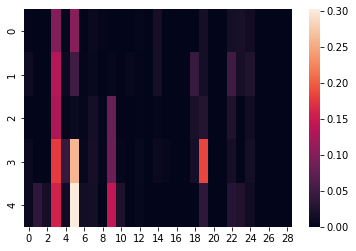

1
0.0011646000632051258


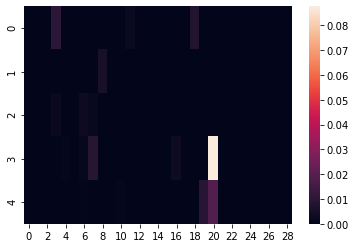

15
0.11115263575503867


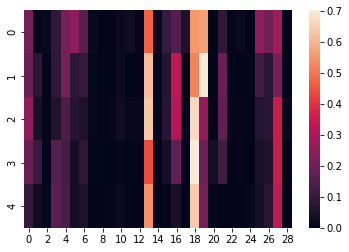

4
0.01564364401469583


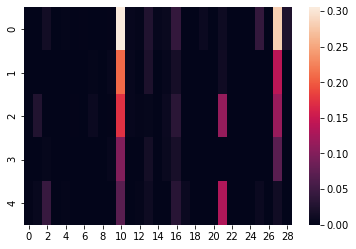

R808 D6
1
0.0040804711197760385


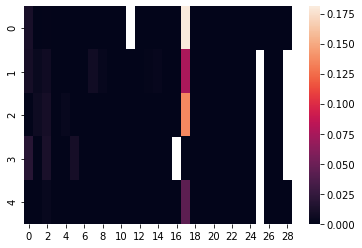

4
0.019779214917046026


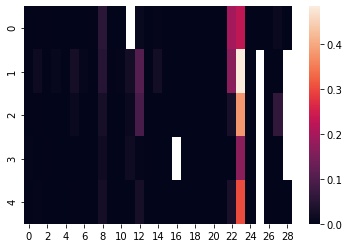

1
0.005032448865926827


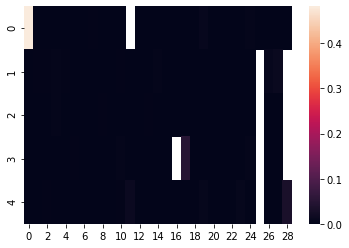

3
0.00691683601158463


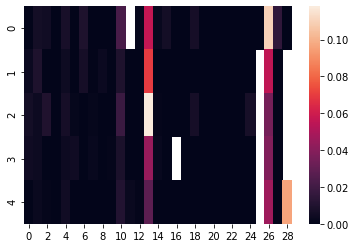

0
0.000566613885852156


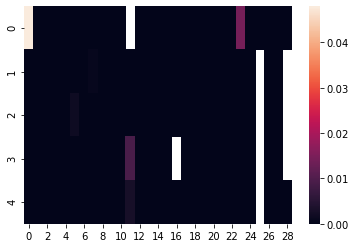

6
0.02436252246948601


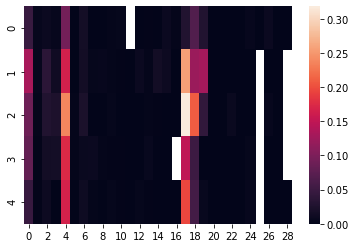

0
0.0012661139699904464


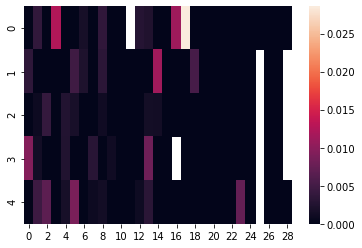

9
0.029521097873351873


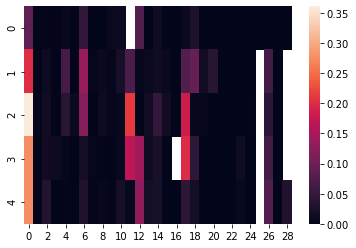

10
0.019713256326960756


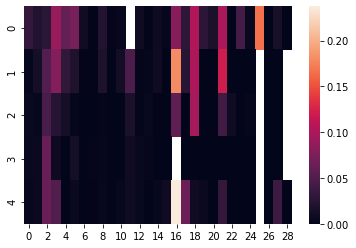

3
0.009429827683459438


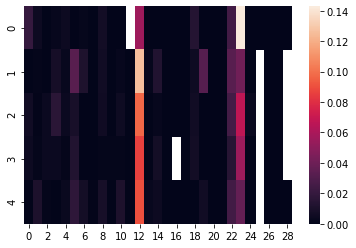

R808 D7
4
0.014111286926636435


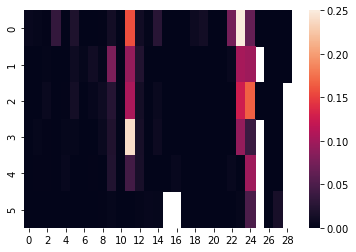

2
0.006101342128799157


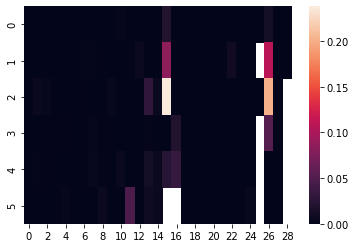

6
0.02173934779568969


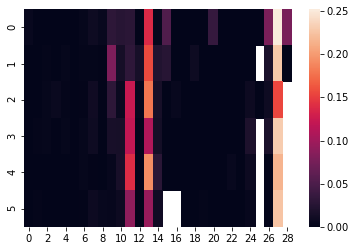

1
0.0010528288199662937


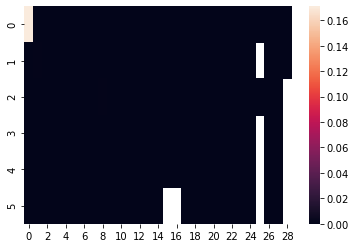

24
0.04428546428560766


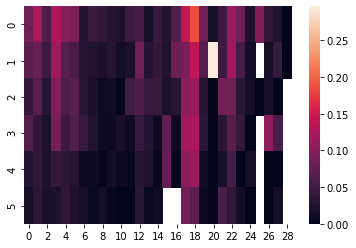

1
0.004330307845120828


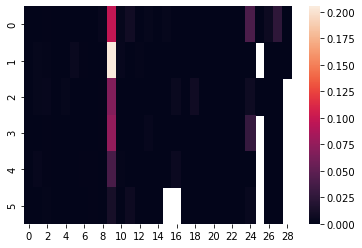

1
0.002023398556971255


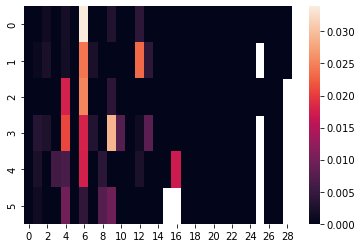

5
0.02189724491243977


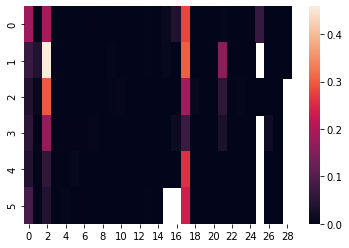

4
0.01812097614216423


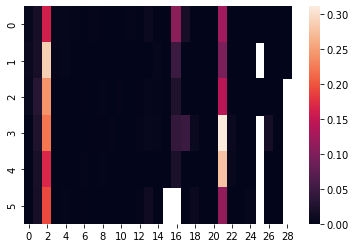

R859 D1
5
0.015405616516685015


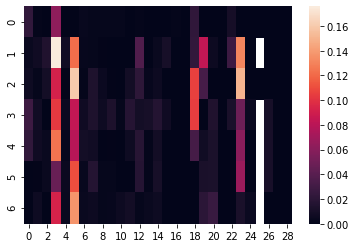

4
0.02502618552928097


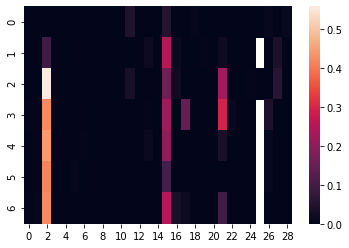

14
0.0539751806836882


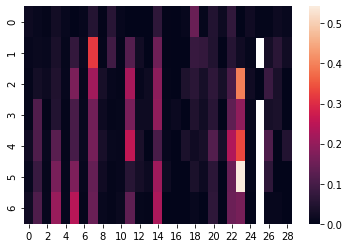

6
0.041281171232183826


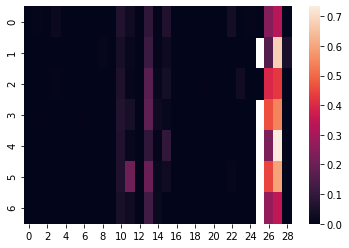

5
0.010480652339403606


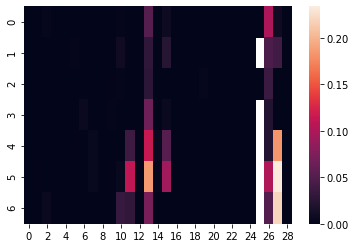

3
0.010315240388565365


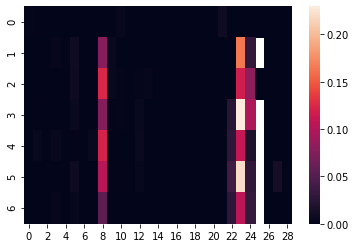

6
0.014536751949588594


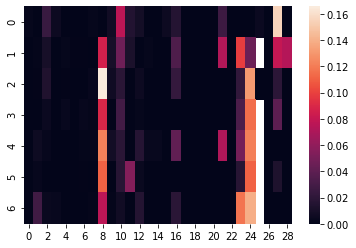

2
0.015031372149409214


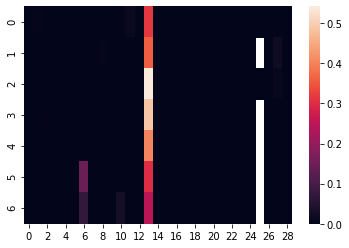

3
0.016738791519258115


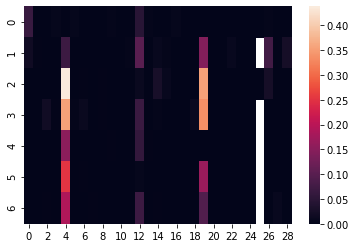

7
0.03553422958050252


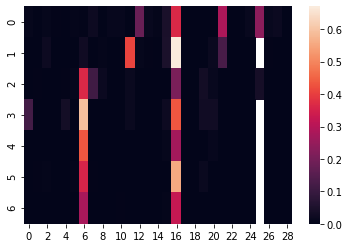

3
0.008590857600642127


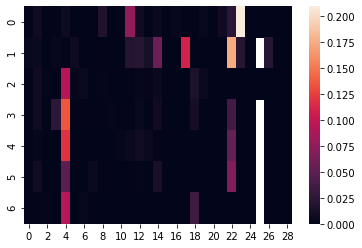

10
0.0492650240691924


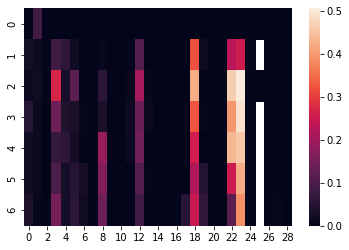

4
0.02067904092970447


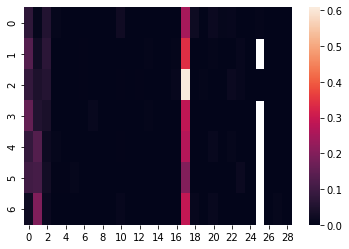

10
0.047057909164542486


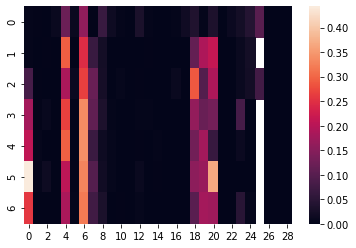

21
0.12011499683501739


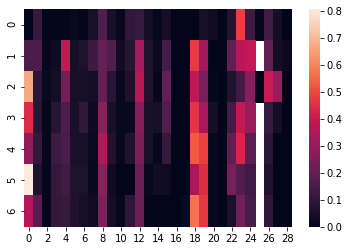

21
0.0647044059946907


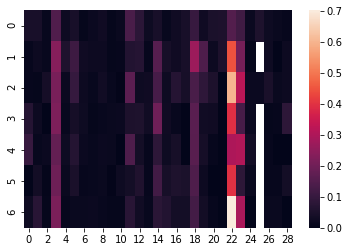

12
0.050958539972546686


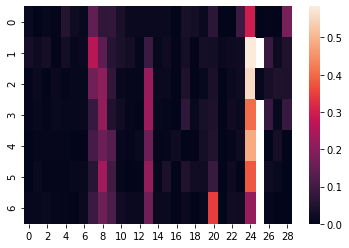

29
0.9684325537940321


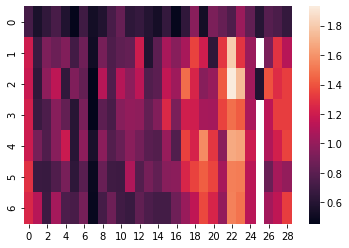

7
0.02873912208028245


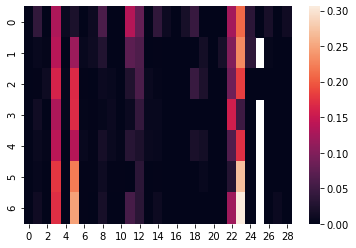

6
0.01929359384354907


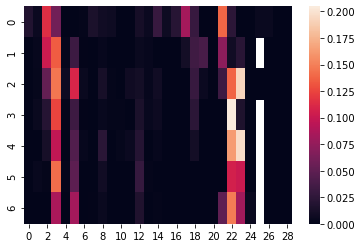

18
0.09795465852415636


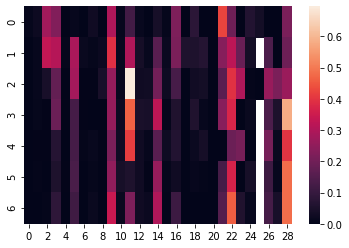

3
0.0054334627920623385


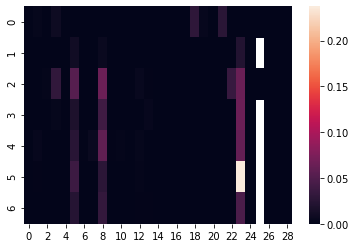

14
0.058704216054197435


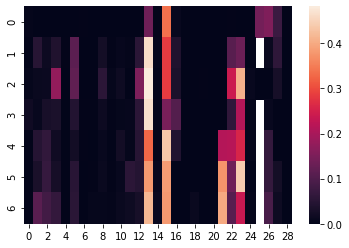

0
0.0006909135266674878


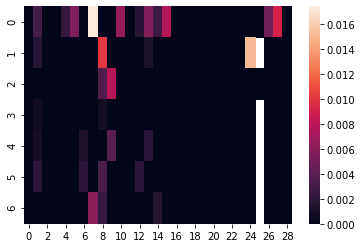

R859 D2
3
0.015286328590036816


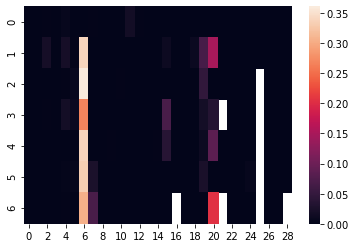

2
0.008185485717370216


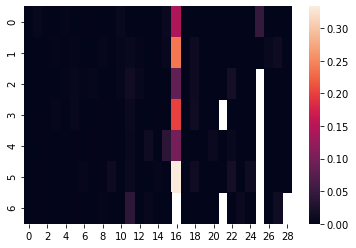

1
0.001315114181576409


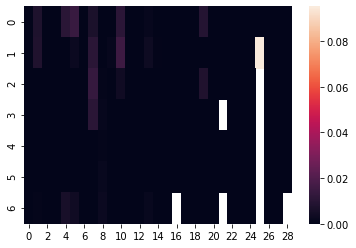

0
0.002862423887629441


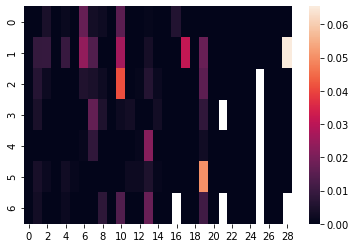

4
0.012647840679666098


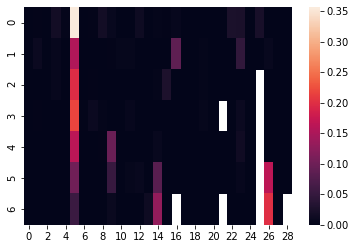

4
0.02977321542049991


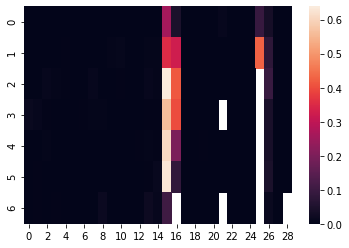

11
0.022779893321619143


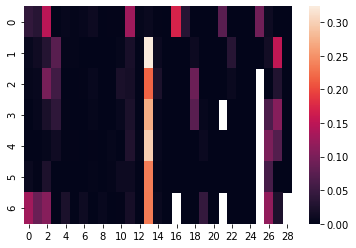

2
0.01531436059840181


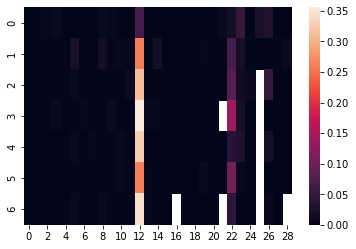

2
0.009153576247599222


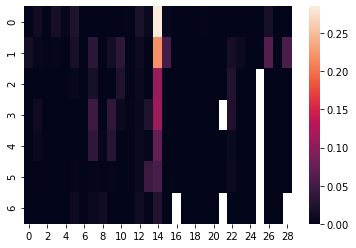

3
0.006202732324108936


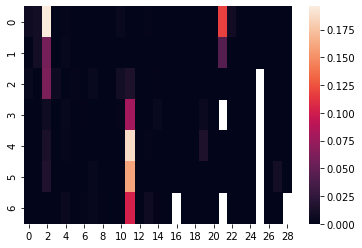

29
1.402467138312028


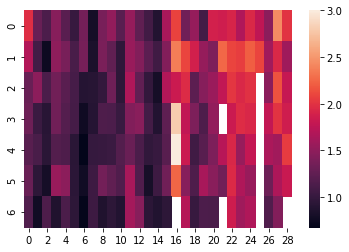

7
0.03132992955711295


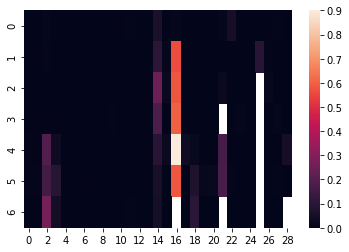

13
0.021321418828974103


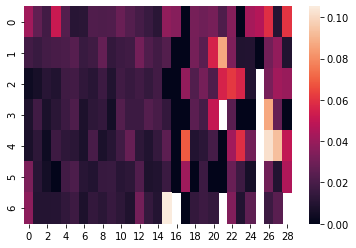

5
0.027310666020972


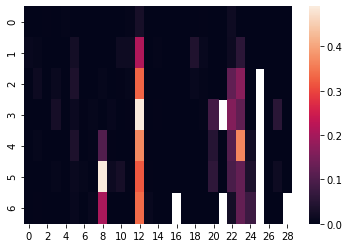

5
0.030516424325152676


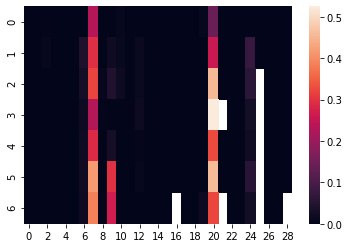

15
0.05699576768343573


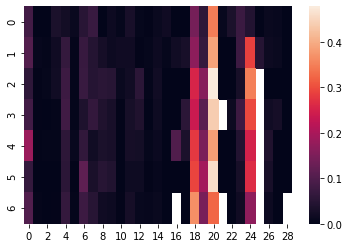

2
0.009741903093090547


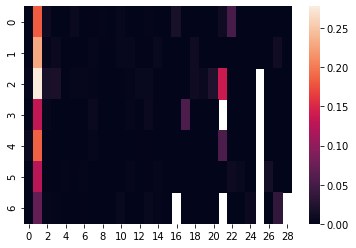

6
0.03800193582831506


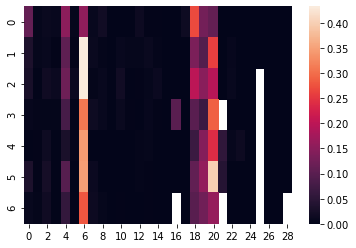

4
0.012330885009415172


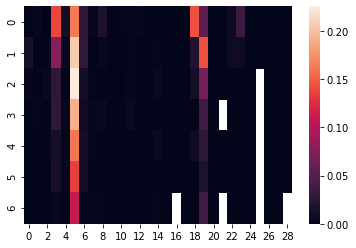

8
0.02979862424367547


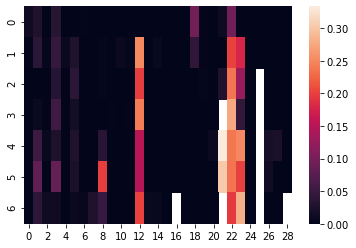

11
0.04037275547012063


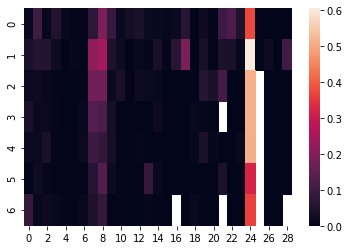

5
0.039447399061069394


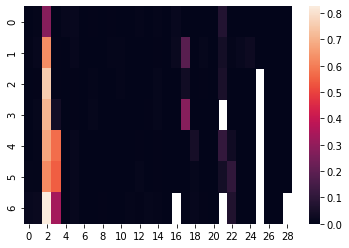

8
0.01798561063780609


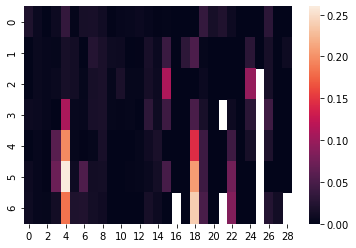

13
0.03721210681684974


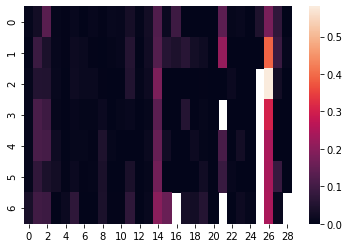

6
0.025894190581224646


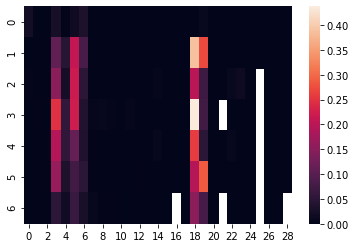

1
0.003109202138641653


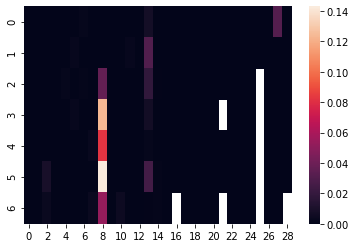

3
0.016553296054576453


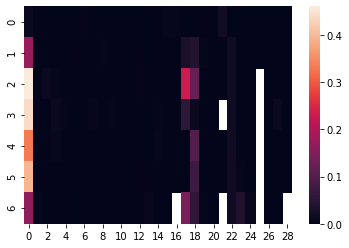

4
0.020538382393293857


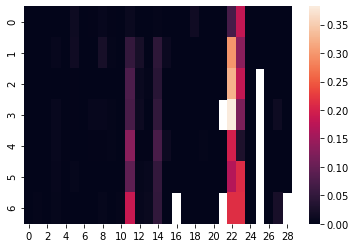

3
0.008124813224018188


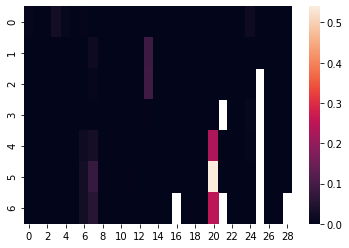

3
0.014372033590337544


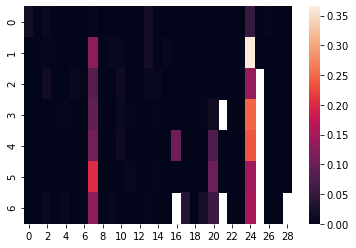

2
0.004642860798770466


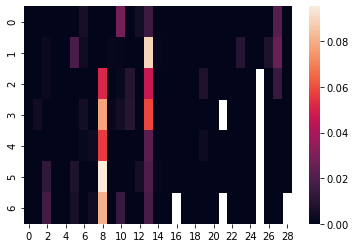

10
0.07524974293420088


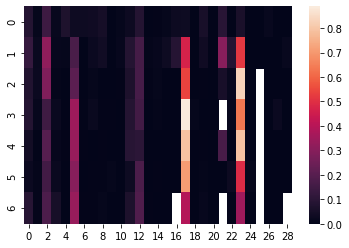

9
0.04927776660109929


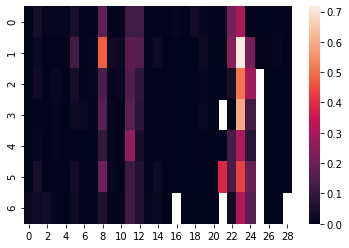

29
1.1878364351445454


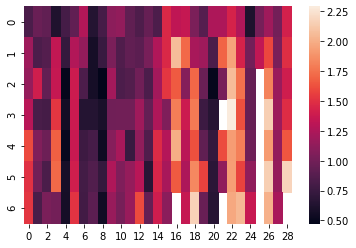

13
0.07445184665497014


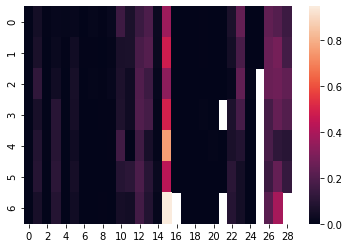

6
0.027526991080642427


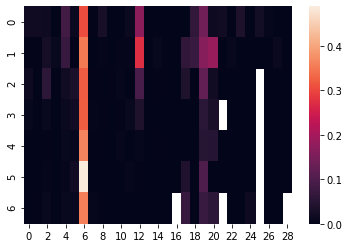

6
0.03182502169700166


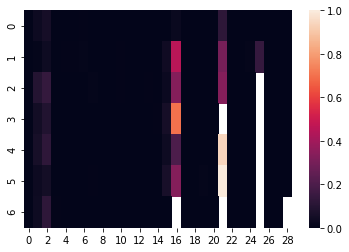

6
0.024159939003519832


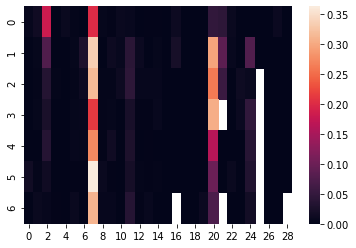

2
0.010425010707043388


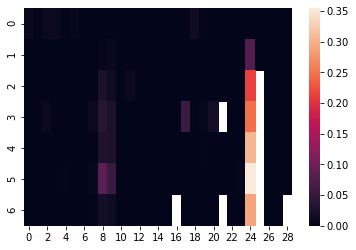

R886 D1
29
0.9449389207263762


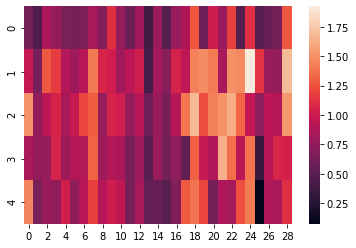

21
0.08753467763162115


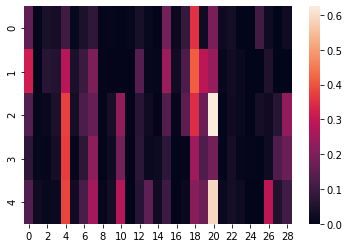

5
0.02319070662903439


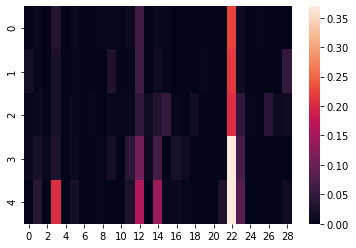

9
0.039369060717214


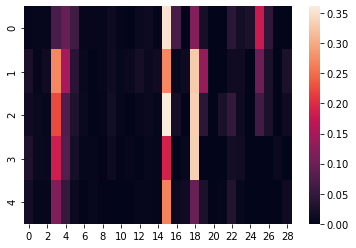

26
0.0442704027488756


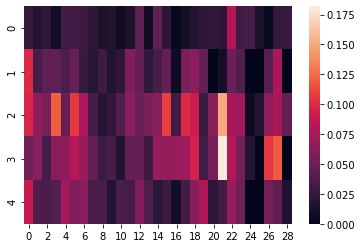

29
0.8225866081545807


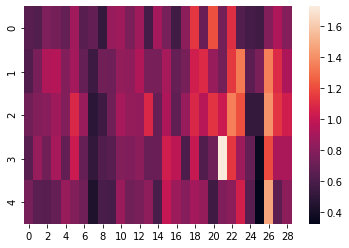

17
0.02107729002327572


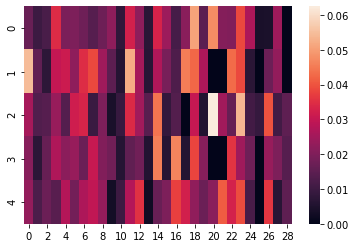

1
0.0029567607707360957


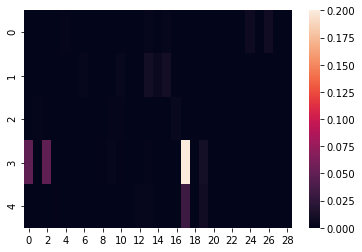

7
0.03935402334757995


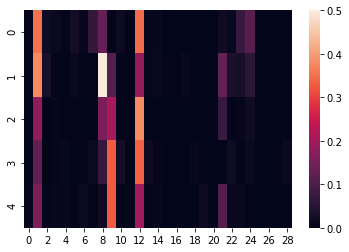

R886 D2
10
0.0641293144966437


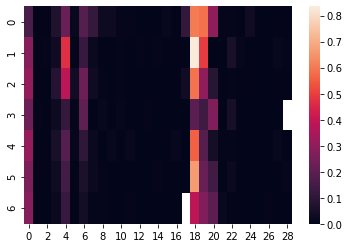

12
0.03338407682312094


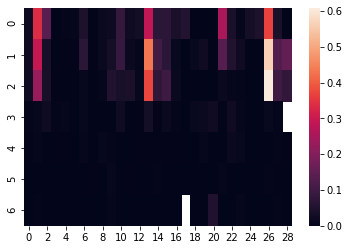

0
0.0009123369691678032


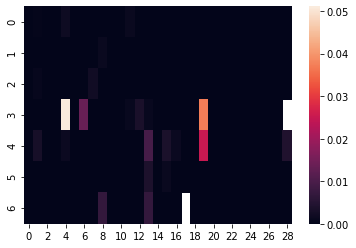

3
0.01594710339707082


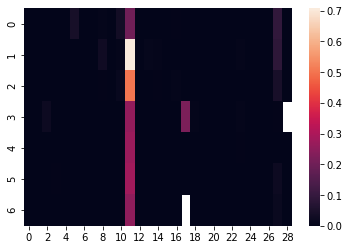

10
0.028281734011735223


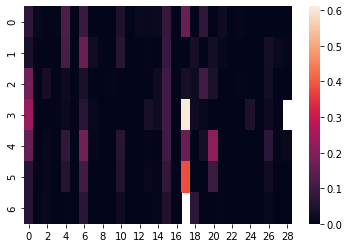

2
0.008479599059746398


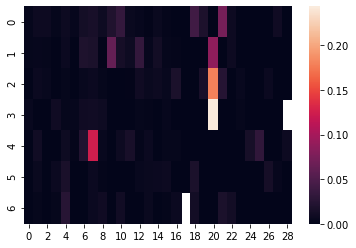

8
0.052355975295935706


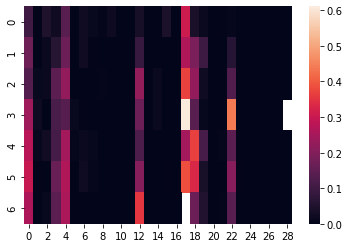

In [172]:
## Trying to find all inter neurons

all_rats = list(alldat.keys())

for rat in all_rats:
    
    all_days = list(alldat[rat].keys())
    for day in all_days:
        print(rat, day)
        anorm = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_time_alley_neur_normalized_.npy')
        anorm[anorm == np.inf] = np.NaN
        for i in range(0, len(anorm[0][0])):
            
            ##if np.nanmean(anorm[:,:,i])>0.04 and np.sum(np.nanmean(anorm[:,:,i], axis = 0)>0.02)>16:
            print(np.sum(np.nanmean(anorm[:,:,i], axis = 0)>0.02)) ##0.01- 15
            sb.heatmap(anorm[:,:,i])
            print(np.nanmean(anorm[:,:,i]))
            plt.show()

In [ ]:
R765 DFD4- 1 maybe
R808 D7 2 maybe 3 yes

R765 RFD5
R765 DFD4
R781 D3
R781 D4
R808 D6
R808 D7
R859 D1
R859 D2
R886 D1
R886 D2


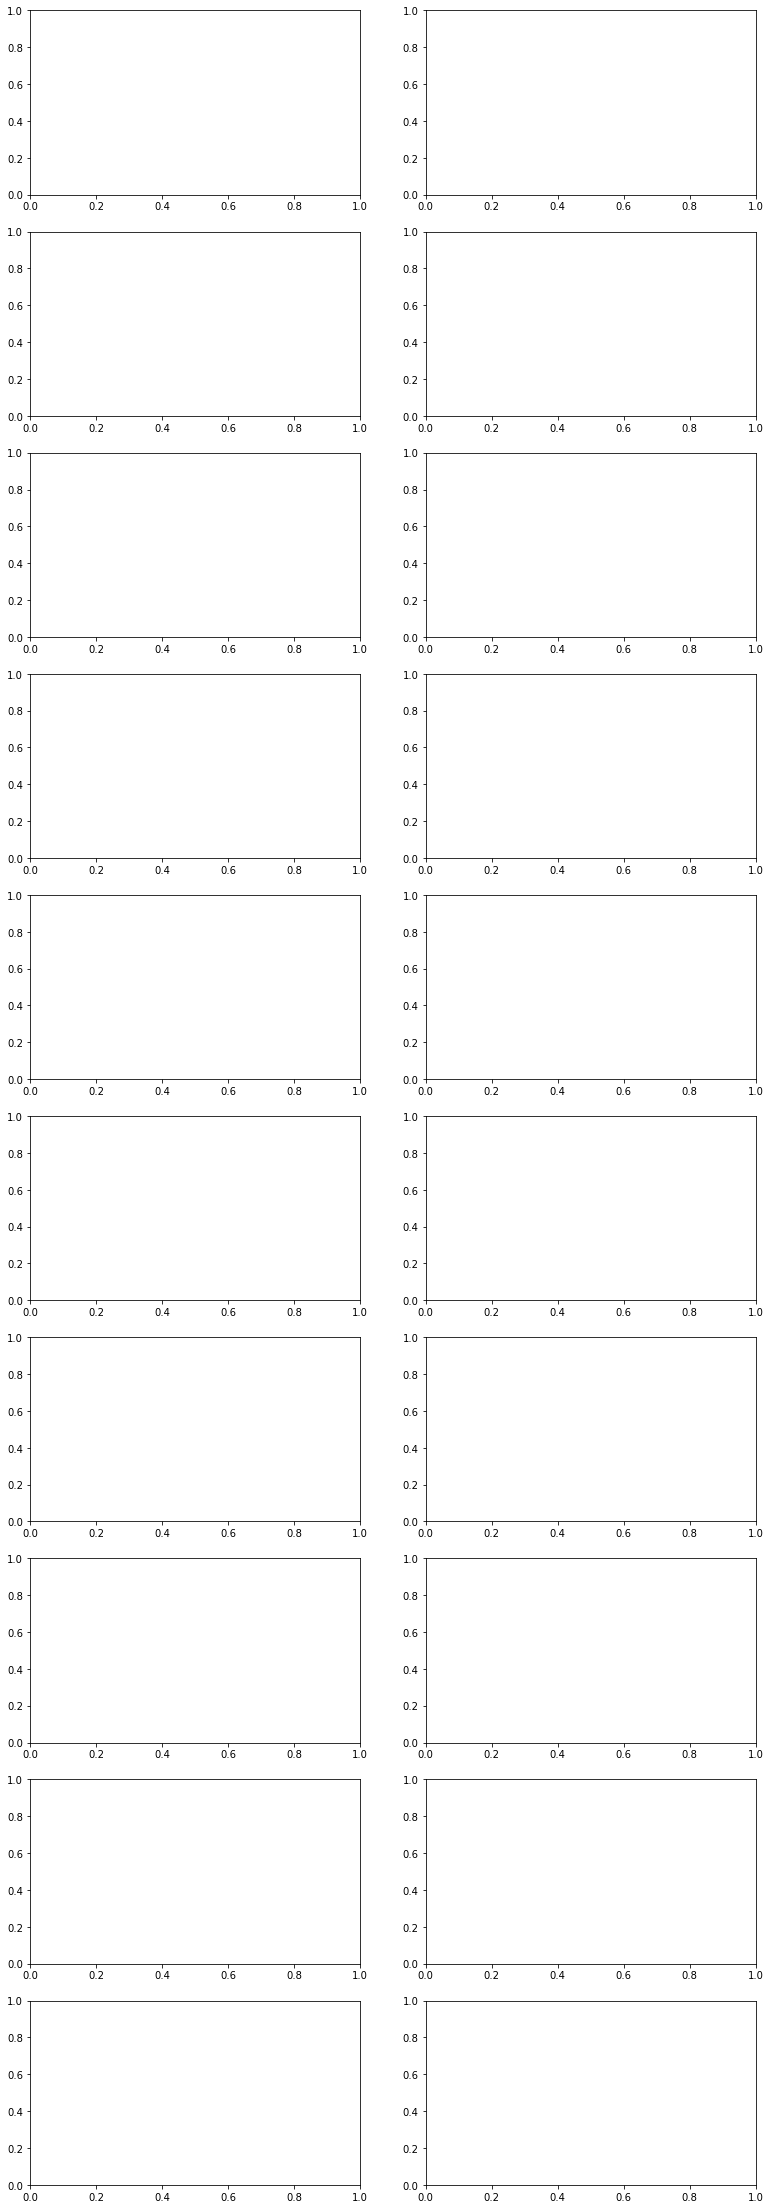

In [120]:
## Studying effect of repetition
## train on all timepoints, test on all timepoints
## takes buffer into account
## train size max 8000

figcount = 0
dt = 10000
include_repeat = False
include_nonrepeat = False
all_num_repeat= []
all_num = []
all_rats = list(alldat.keys())
all_rat_day = []
all_train_scores = []
all_test_scores = []
for rat in all_rats:
    
    all_days = list(alldat[rat].keys())
    for day in all_days:
        print(rat, day)
        train_scores1 = []
        train_scores2 = []
        test_scores1 = []
        test_scores2 = []
        for rep in range(0,20):
            inst_fr = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_inst_fr.npy')
            x_order = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_x_within.npy')
            y_order = np.load('maanasa/DATA/FILES/' + rat + '_' + day + '_y_within.npy')
        
            shuff_start = np.random.choice(len(inst_fr),1)[0]
            shuff_inst_fr = np.vstack((inst_fr[shuff_start:,:], inst_fr[0:shuff_start,:]))
            inst_fr = shuff_inst_fr
            x = np.concatenate((x_order[shuff_start:], x_order[0:shuff_start]))
            y = np.concatenate((y_order[shuff_start:], y_order[0:shuff_start]))
            
            repeating_cells = []
            all_cells = alldat[rat][day]['units'].keys()
            for each_cell in all_cells:
                data = alldat[rat][day]['units'][each_cell]
                if data.repeating == True:
                    repeating_cells.append(True)
                else:
                    repeating_cells.append(False)
                    
            repeating_cells = np.array(repeating_cells)
            repeat_len = np.sum(repeating_cells)
            non_repeat_len = len(repeating_cells)- repeat_len
            
            if rep== 0:
                all_num_repeat.append(repeat_len)
                all_num_repeat.append(len(repeating_cells))
                
            if include_repeat == True:
                if repeat_len<non_repeat_len:
                    inst_fr = inst_fr[:,repeating_cells]
                else:
                    cells_chosen = np.random.choice(np.where(repeating_cells== True)[0],non_repeat_len)
                    inst_fr = inst_fr[:,cells_chosen]
                    
            elif include_nonrepeat == True:
                if repeat_len<non_repeat_len:
                    cells_chosen = np.random.choice(np.where(repeating_cells== False)[0],np.sum(repeating_cells))
                    inst_fr = inst_fr[:,cells_chosen]
                else:
                    inst_fr = inst_fr[:,~repeating_cells]

            ## it is possible there are no repeating cells    
            if len(inst_fr[0])!=0:
                ##print(len(inst_fr[0]))
                ##print(np.sum(repeating_cells))
                ##print(len(repeating_cells))
                all_rat_day.append(rat + '_' + day)

                target1 = x
                target1 = (target1-np.mean(target1))/np.std(target1)
                
                target2 = y
                target2 = (target2-np.mean(target2))/np.std(target2)

                ##all_train_sizes = np.arange(100,8000, 100)
                all_train_sizes = np.array([8000])
                for train_size in all_train_sizes:
                    test_size = 1000
                    buffer = int((dt-train_size-test_size)/2)
                    for i in range(0, int(len(inst_fr)/dt)):
                        ##print(i)
                        ##print('doing')
                        if i == 0:
                            ##print('training', i*dt, i*dt + train_size)
                            X_train = inst_fr[i*dt : i*dt + train_size,:]
                            y_train1 = target1[i*dt : i*dt + train_size]
                            y_train2 = target2[i*dt : i*dt + train_size]
                            X_test = inst_fr[(i)*dt + train_size + buffer: (i)*dt + train_size + buffer+test_size,:]
                            y_test1 = target1[(i)*dt + train_size + buffer: (i)*dt + train_size + buffer+test_size]
                            y_test2 = target2[(i)*dt + train_size + buffer: (i)*dt + train_size + buffer+test_size]
                            ##print('testing', (i)*dt + train_size + buffer,(i)*dt + train_size + buffer+test_size )
                        else:
                            X_train  = np.vstack((X_train, inst_fr[i*dt + buffer: i*dt + train_size+ buffer]))
                            ##print('training', i*dt + buffer,i*dt + train_size+ buffer)
                            X_test = np.vstack((X_test, inst_fr[(i)*dt + train_size + 2*buffer: (i)*dt + train_size + 2*buffer+test_size,:]))
                            ##print('testing',(i)*dt + train_size + 2*buffer,((i)*dt + train_size + 2*buffer+test_size))
                            y_train1 = np.append(y_train1, target1[i*dt+ buffer: i*dt + train_size+ buffer])
                            y_test1 = np.append(y_test1, target1[(i)*dt + train_size + 2*buffer: (i)*dt + train_size + 2*buffer+test_size])

                            y_train2 = np.append(y_train2, target2[i*dt+ buffer: i*dt + train_size+ buffer])
                            y_test2 = np.append(y_test2, target2[(i)*dt + train_size + 2*buffer: (i)*dt + train_size + 2*buffer+test_size])

                    scaler = StandardScaler()
                    X_train = scaler.fit_transform(X_train)
                    X_test = scaler.transform(X_test)        

                    model = LinearRegression()
                    model.fit(X_train, y_train1)
                    
                    model2 = LinearRegression()
                    model2.fit(X_train, y_train2)

                    ##train_scores1.append(model.score(X_train, y_train1))
                    train_scores1.append(r2_score(y_train1,model.predict(X_train)))
                    ##test_scores1.append(model.score(X_test, y_test1))
                    test_scores1.append(r2_score(y_test1, model.predict(X_test)))
                    train_scores2.append(model2.score(X_train, y_train2))
                    test_scores2.append(model2.score(X_test, y_test2))
 
        train_scores1 = np.array(train_scores1)
        test_scores1 = np.array(test_scores1)
        train_scores2 = np.array(train_scores2)
        test_scores2 = np.array(test_scores2)
        all_train_scores.append(train_scores1)
        all_test_scores.append(test_scores1)



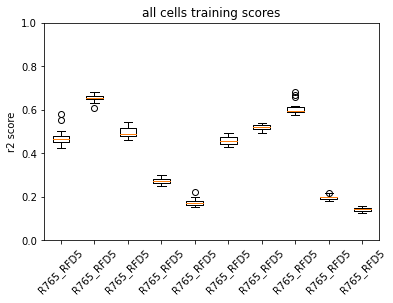

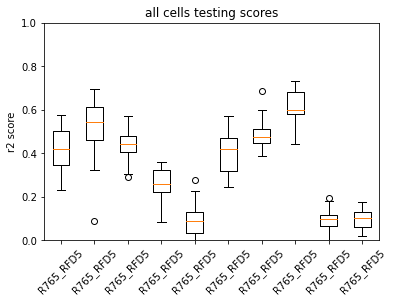

In [121]:
fig, ax = plt.subplots()
ax.boxplot(all_train_scores)
ax.set_xticklabels(all_rat_day,rotation = 45)
ax.set_ylim(0,1)
ax.set_title('all cells training scores')
ax.set_ylabel('r2 score')
plt.show()
fig, ax = plt.subplots()
ax.boxplot(all_test_scores)
##plt.xticks(all_rat_day)
ax.set_xticklabels(all_rat_day,rotation = 45)
ax.set_ylim(0,1)
ax.set_title('all cells testing scores')
ax.set_ylabel('r2 score')

plt.show()